In [252]:
ENV["GKS_ENCODING"] = "utf-8"
using NLsolve
using Plots
using SharedArrays

using Pkg
using HDF5
Pkg.activate("/home/julian/Hamburg/LadderDGA.jl")
using LadderDGA
using Logging


include("/home/julian/Hamburg/LadderDGA_utils.jl/new_lambda_analysis.jl")

cfg_file = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_40_40_s1.toml";


  Activating project at `~/Hamburg/LadderDGA.jl`


In [253]:
mP, sP, env, kGridsStr = readConfig(cfg_file)
impQ_sp, impQ_ch, GImp, qGridLoc, kG, GLoc, GLoc_fft, Σ_loc, FUpDo = setup_LDGA(kGridsStr[1], mP, sP, env);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 8
[ Info: setting usable ranges of sp and ch channel from 5:77 and 5:77 to the same range of 5:77
[ Warning: TODO: update local omega sum with correction
[ Warning: using unoptimized sum_freq
[ Warning: using unoptimized sum_freq
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(5:77) = 0.2831, χLoc_ch(5:77) = 0.1905
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.23682558326168696 ?≈? 0.24951420011426173 ?=? 0.24951420011426173 ?≈? 0.25"


In [349]:
# "local" correction quantities
bubbleLoc = calc_bubble(GImp, qGridLoc, mP, sP);
locQ_sp = calc_χ_trilex(impQ_sp.Γ, bubbleLoc, qGridLoc, mP.U, mP, sP);
locQ_ch = calc_χ_trilex(impQ_ch.Γ, bubbleLoc, qGridLoc, -mP.U, mP, sP);
Σ_ladderLoc = calc_Σ(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
    qGridLoc,  mP, sP) .+ mP.n * mP.U/2.0;

# ladder quantities
bubble = calc_bubble(GLoc_fft, kG, mP, sP);
nlQ_sp = calc_χ_trilex(impQ_sp.Γ, bubble, kG, mP.U, mP, sP);
nlQ_ch = calc_χ_trilex(impQ_ch.Γ, bubble, kG, -mP.U, mP, sP);

nlQ_sp_nλ = deepcopy(nlQ_sp)
nlQ_ch_nλ = deepcopy(nlQ_ch);

In [352]:
#λ_sp, λ_spch  = λ_correction!(:sp,impQ_sp, impQ_ch, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, bubble, GLoc_fft, kG, mP, sP)

Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, bubble, GLoc_fft, FUpDo, kG, mP, sP)
Σ_ladder_corrected = similar(Σ_ladder)
for qi in 1:size(Σ_ladder,1)
    Σ_ladder_corrected[qi,:] = Σ_ladder[qi,:] .- Σ_ladderLoc[1,1:size(Σ_ladder,2)] .+ Σ_loc[1:size(Σ_ladder,2)];
end

In [256]:
 #r = LadderDGA.extended_λ(nlQ_sp_nλ, nlQ_ch_nλ, bubble, GLoc_fft, FUpDo, Σ_loc, Σ_ladderLoc[:,:], kG, mP, sP)

[ Info: searching for λsp_ch, starting from -0.014275136018503689 -2.0235147394693493
-10.515397187245178 .< 1.0857248639814963 reset to [0.1, 0.1] to [0.11000000000000001, 0.11000000000000001]
-10.654184128632641 .< 1.0957248639814963 reset to [0.11000000000000001, 0.11000000000000001] to [0.12100000000000002, 0.12100000000000002]
-10.80742335241661 .< 1.1067248639814964 reset to [0.12100000000000002, 0.12100000000000002] to [0.13310000000000002, 0.13310000000000002]
-10.97667747973164 .< 1.1188248639814964 reset to [0.13310000000000002, 0.13310000000000002] to [0.14641000000000004, 0.14641000000000004]
-11.16369618397575 .< 1.1321348639814963 reset to [0.14641000000000004, 0.14641000000000004] to [0.16105100000000006, 0.16105100000000006]
-11.37041023607377 .< 1.1467758639814964 reset to [0.16105100000000006, 0.16105100000000006] to [0.17715610000000007, 0.17715610000000007]
-11.599004054671681 .< 1.1628809639814963 reset to [0.17715610000000007, 0.17715610000000007] to [0.1948717100

-1583.749734742572 .< 34.47870521353753 reset to [33.492980349556035, 33.492980349556035] to [36.84227838451164, 36.84227838451164]
-1820.2315740122476 .< 37.82800324849313 reset to [36.84227838451164, 36.84227838451164] to [40.5265062229628, 40.5265062229628]
-2093.238798106541 .< 41.5122310869443 reset to [40.5265062229628, 40.5265062229628] to [44.57915684525908, 44.57915684525908]
-2408.5391917747934 .< 45.564881709240574 reset to [44.57915684525908, 44.57915684525908] to [49.037072529784986, 49.037072529784986]
-2772.829654049825 .< 50.02279739376648 reset to [49.037072529784986, 49.037072529784986] to [53.940779782763485, 53.940779782763485]
-3193.8929933645836 .< 54.92650464674498 reset to [53.940779782763485, 53.940779782763485] to [59.334857761039835, 59.334857761039835]
-3680.783580965483 .< 60.32058262502133 reset to [59.334857761039835, 59.334857761039835] to [65.26834353714382, 65.26834353714382]
-4244.039944089621 .< 66.25406840112532 reset to [65.26834353714382, 65.26834

-3.830070048932623e7 .< 12340.562784517184 reset to [12339.577059653202, 12339.577059653202] to [13573.534765618522, 13573.534765618522]
-4.620157439999497e7 .< 13574.520490482504 reset to [13573.534765618522, 13573.534765618522] to [14930.888242180376, 14930.888242180376]
-5.574182852754157e7 .< 14931.873967044357 reset to [14930.888242180376, 14930.888242180376] to [16423.977066398413, 16423.977066398413]
-6.726947875661975e7 .< 16424.962791262395 reset to [16423.977066398413, 16423.977066398413] to [18066.374773038253, 18066.374773038253]
-8.121752877823476e7 .< 18067.360497902235 reset to [18066.374773038253, 18066.374773038253] to [19873.01225034208, 19873.01225034208]
-9.805599919587868e7 .< 19873.99797520606 reset to [19873.01225034208, 19873.01225034208] to [21860.313475376286, 21860.313475376286]
-1.1839294336242142e8 .< 21861.299200240268 reset to [21860.313475376286, 21860.313475376286] to [24046.344822913914, 24046.344822913914]
-1.4301142394360474e8 .< 24047.330547777896 r

-3.5361652126647476e12 .< 3.757175640095743e6 reset to [3.757174654370879e6, 3.757174654370879e6] to [4.132892119807967e6, 4.132892119807967e6]
-4.19106509164875e12 .< 4.132893105532831e6 reset to [4.132892119807967e6, 4.132892119807967e6] to [4.546181331788763e6, 4.546181331788763e6]
-4.929746104227455e12 .< 4.546182317513627e6 reset to [4.546181331788763e6, 4.546181331788763e6] to [5.00079946496764e6, 5.00079946496764e6]
-6.27824175866616e12 .< 5.000800450692504e6 reset to [5.00079946496764e6, 5.00079946496764e6] to [5.500879411464404e6, 5.500879411464404e6]
-7.430573319691353e12 .< 5.500880397189268e6 reset to [5.500879411464404e6, 5.500879411464404e6] to [6.050967352610845e6, 6.050967352610845e6]
-8.96762745621021e12 .< 6.050968338335709e6 reset to [6.050967352610845e6, 6.050967352610845e6] to [6.65606408787193e6, 6.65606408787193e6]
-1.0725337361506352e13 .< 6.656065073596793e6 reset to [6.65606408787193e6, 6.65606408787193e6] to [7.321670496659122e6, 7.321670496659122e6]
-1.20443

LoadError: LinearAlgebra.LAPACKException(1)

# Preparation

For the extended $\lambda$ correction, we need to compute ladder kinetic and potential energy of the system and also compute the DMFT kinetic energy (for improved sums)

# Cond 1 Test
## λsp(λch)

In [332]:
nh = ceil(Int64, size(nlQ_ch.χ,2)/2)
λch_min = -1 / maximum(real.(nlQ_ch_nλ.χ[:,nh]))
λsp_min = -1 / maximum(real.(nlQ_sp_nλ.χ[:,nh]))
println("estimated smallest vaue for λ λsp ≈ $(λsp_min), λch ≈ $(λch_min)")

estimated smallest vaue for λ λsp ≈ -0.014275136018503689, λch ≈ -2.0235147394693493


In [405]:
χ_λ! = LadderDGA.χ_λ!
kintegrate = LadderDGA.kintegrate
subtract_tail = LadderDGA.subtract_tail
DirectSum = LadderDGA.DirectSum
kGrid = kG
ωindices = intersect(nlQ_sp.usable_ω, nlQ_ch.usable_ω)
iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω)[ωindices] .* π ./ mP.β
χch_λ = Array{Complex{Float64},2}(undef, size(nlQ_sp.χ,1) ,length(ωindices))
max_λsp = 10.0
max_λch = 0.0
λch_range_nl = λch_min:0.02:max_λch
spOfch_max_nl = zeros(length(λch_range_nl))
χupdo_ω = Array{Float64,1}(undef, length(ωindices))
χupup_ω = Array{Float64,1}(undef, length(ωindices))

for (λi,λchi) in enumerate(λch_range_nl)
    χsp_λ = real.(deepcopy(nlQ_sp_nλ.χ[:,ωindices]))
    χ_λ!(χch_λ, nlQ_ch_nλ.χ[:,ωindices], λchi)
    χch_ω = kintegrate(kGrid, χch_λ, 1)[1,:]
    χch_ω_sub = subtract_tail(χch_ω, mP.Ekin_DMFT, iωn)
    χch_sum = real(sum(χch_ω_sub))/mP.β - mP.Ekin_DMFT*mP.β/12
    rhs_val = (mP.n) * (1 - mP.n/2) - χch_sum
    spOfch_max_nl[λi] = LadderDGA.λsp(χsp_λ, iωn, mP.Ekin_DMFT, rhs_val, kGrid, mP)
end

λch_range_filtered = filter_usable_λsp_of_λch(λch_range_nl, spOfch_max_nl; max_λsp=max_λsp)
λch_range = λch_range_nl[λch_range_filtered]
spOfch = spOfch_max_nl[λch_range_filtered];

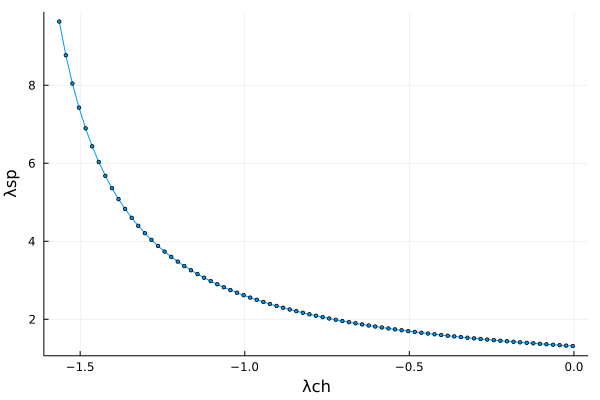

In [406]:
plot(λch_range, spOfch, markershape=:circle, markersize=2, xlabel="λch", ylabel="λsp", label="")

# cond2
## λsp(λch)

In [438]:
include("/home/julian/Hamburg/LadderDGA_utils.jl/new_lambda_analysis.jl")
res2 = c2_along_λsp_of_λch(λch_range, spOfch, nlQ_sp, nlQ_ch, bubble,
                        Σ_ladderLoc, Σ_loc, GLoc_fft, FUpDo, kG, mP, sP);

In [439]:
abs.(res .- res2)

79×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [430]:
res = Array{Float64, 2}(undef, length(λch_range), 6)
ωindices = (sP.dbg_full_eom_omega) ? (1:size(bubble,3)) : intersect(nlQ_sp.usable_ω, nlQ_ch.usable_ω)
iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω)[ωindices] .* π ./ mP.β
χupuptail_sub = subtract_tail(zeros(eltype(nlQ_sp.χ),length(ωindices)), mP.Ekin_DMFT, iωn)
corr = Σ_correction(ωindices, bubble, FUpDo, sP)
(sP.tc_type_f != :nothing) && LadderDGA.extend_corr!(corr)

νmax = trunc(Int,size(bubble,LadderDGA.ν_axis)/3)
iν_n = LadderDGA.iν_array(mP.β, 0:(νmax-1))
Σ_hartree = mP.n * mP.U/2
E_kin_tail_c = [zeros(size(kG.ϵkGrid)), (kG.ϵkGrid .+ Σ_hartree .- mP.μ)]
E_pot_tail_c = [zeros(size(kG.ϵkGrid)),
            (mP.U^2 * 0.5 * mP.n * (1-0.5*mP.n) .+ Σ_hartree .* (kG.ϵkGrid .+ Σ_hartree .- mP.μ))]
tail = [1 ./ (iν_n .^ n) for n in 1:length(E_kin_tail_c)]
E_pot_tail = permutedims(sum(E_pot_tail_c[i]' .* tail[i] for i in 1:length(tail)),(2,1))
E_kin_tail = permutedims(sum(E_kin_tail_c[i]' .* tail[i] for i in 1:length(tail)),(2,1))
E_pot_tail_inv = sum((mP.β/2)  .* [Σ_hartree .* ones(size(kG.ϵkGrid)), (-mP.β/2) .* E_pot_tail_c[2]])
E_kin_tail_inv = sum(map(x->x .* (mP.β/2) .* kG.ϵkGrid , [1, -(mP.β) .* E_kin_tail_c[2]]));

χsp = deepcopy(nlQ_sp.χ);
χch = deepcopy(nlQ_ch.χ);
χupdo_ω = Array{Float64,1}(undef, length(ωindices))
χupup_ω = Array{Float64,1}(undef, length(ωindices))

G_λ = Array{ComplexF64, 2}(undef, length(kG.kMult), νmax)
Σ_corr = Σ_loc[1:νmax] .- Σ_ladderLoc[1,1:νmax] .+ Σ_hartree

Σ_λ_ω = Array{Complex{Float64},3}(undef,size(bubble,1),νmax,size(bubble,3))
Σ_λ = Array{Complex{Float64},2}(undef,size(bubble,1),νmax)
Kνωq = Array{ComplexF64, length(gridshape(kG))}(undef, gridshape(kG)...)
Kνωq_pre = Array{ComplexF64, 1}(undef, length(kG.kMult))

tttt = deepcopy(nlQ_sp_nλ.χ)

@timeit LadderDGA.to "lch loop" for i in 1:length(λch_range)
    λsp_i = spOfch[i]
    λch_i = λch_range[i]
    LadderDGA.χ_λ!(nlQ_sp.χ, nlQ_sp_nλ.χ, λsp_i, ωindices)
    LadderDGA.χ_λ!(nlQ_ch.χ, nlQ_ch_nλ.χ, λch_i, ωindices)
    #TODO: sc here, this could be inclines to avoid realloc of Σ_ladder_ω
    @timeit LadderDGA.to "Σ_ω" LadderDGA.calc_Σ_ω!(Σ_λ_ω, Kνωq, Kνωq_pre, ωindices, nlQ_sp, nlQ_ch, GLoc_fft, corr, mP.U, kG, sP)
    @inbounds @views Σ_λ[:,:] = (mP.U/mP.β) .* sum(Σ_λ_ω, dims=[3])[:,:,1]

    for ni in 0:νmax-1
        for (j,ek) in enumerate(kG.ϵkGrid)
            @inbounds Σ_λ[j,ni+1] += Σ_corr[ni+1]
            @inbounds G_λ[j,ni+1] = 1/((π/mP.β)*(2*ni + 1)*1im + mP.μ - ek - Σ_λ[j,ni+1])
        end
    end
    #TODO: sc end here
    EPot = LadderDGA.calc_E_pot(kG, G_λ, Σ_λ, E_pot_tail, E_pot_tail_inv, mP.β)
    for (wi,w) in enumerate(ωindices)
        @inbounds χupup_ω[wi] = χupuptail_sub[wi]
        @inbounds χupdo_ω[wi] = 0.0
        for (ki,km) in enumerate(kG.kMult)
            @inbounds χupup_ω[wi] += km * (real(nlQ_ch.χ[ki,w]) + real(nlQ_sp.χ[ki,w])) / (2*kG.Nk)
            @inbounds χupdo_ω[wi] += km * (real(nlQ_ch.χ[ki,w]) - real(nlQ_sp.χ[ki,w])) / (2*kG.Nk)
        end
    end
 
    lhs_c1 = sum(χupup_ω)/mP.β - mP.Ekin_DMFT*mP.β/12
    lhs_c2 = sum(χupdo_ω)/mP.β
    rhs_c1 = mP.n/2 * (1 - mP.n/2)
    rhs_c2 = EPot/mP.U - (mP.n/2) * (mP.n/2)
    res[i,:] = [λsp_i λch_i lhs_c1 rhs_c1 lhs_c2 rhs_c2]
end

nlQ_sp.χ[:,:] .= χsp[:,:]
nlQ_ch.χ[:,:] .= χch[:,:];

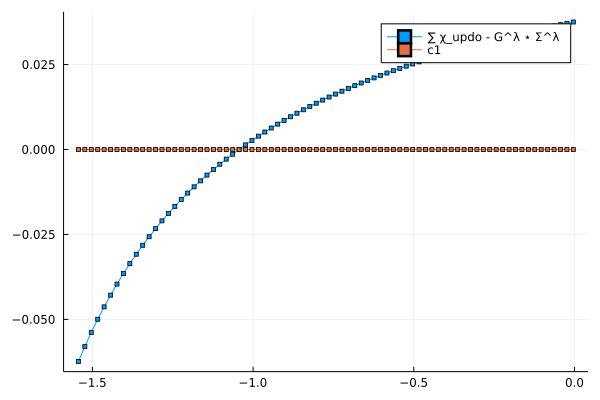

In [429]:
xarr = 2:length(λch_range)
plot(λch_range[xarr], res[xarr,6] .- res[xarr,5], markershape=:square, markersize=2, label="∑ χ_updo - G^λ ⋆ Σ^λ")
#plot!(λch_range[xarr], res[xarr,5] .- res[xarr,7], markershape=:square, markersize=2, label="fast comp. ∑ χ_updo - Gloc ⋆ Σ^λ")
plot!(λch_range[xarr],res[xarr,3] .- res[xarr,4], markershape=:square, markersize=2, label="c1")
#savefig("conditions_new.pdf")
#plot!(λch_range, spOfch_max_nl, ylims=(-5,5), markershape=:circle, markersize=2, xlabel="λch", ylabel="λsp", label="")

In [18]:
f1 = [1.0 3.1]
f2 = [1.0 3.1]
λttt = [0.1 3.2]
@time cond_both_old!(f1, λttt)
@time cond_both!(f2, λttt)
println("$f1 vs $f2 <=> $(f1 ≈ f2)")

LoadError: UndefVarError: cond_both_old! not defined

In [19]:
x0 = [λsp_min, λch_min]

function cond_both(λ)
    F = zeros(size(λ)...)
    cond_both!(F,λ)
    return F
end
@time LadderDGA.newton_2d_right(cond_both, x0, nsteps=100, atol=1e-6)

LoadError: UndefVarError: cond_both! not defined

In [20]:
cond_both([-0.001809180794405985, 1.0140624318248035])

LoadError: UndefVarError: cond_both not defined

In [21]:
@time r = LadderDGA.extended_λ(nlQ_sp_nλ, nlQ_ch_nλ, bubble, GLoc_fft, FUpDo, Σ_loc, Σ_ladderLoc, kG, mP, sP)

LoadError: UndefVarError: nlQ_sp_nλ not defined

In [22]:
using Profile
using ProfileSVG
@profview cond_both!(f2, λttt)

LoadError: UndefVarError: cond_both! not defined

In [23]:
Σ_λ = Σ_ladder_corrected[1:νmax,:]
#Σ_λ = (Σ_ladder_i .- Σ_ladderLoc[1:size(Σ_ladder_i,1)] .+ Σ_loc[1:size(Σ_ladder_i,1)]);
E_kin_DGA, E_pot_DGA_i = LadderDGA.calc_E(Σ_λ, kGrid, mP, sP)
#E3 = LadderDGA.calc_E_pot(kG, GLoc[0:νmax-1,:].parent, Σ_λ, E_pot_tail, E_pot_tail_inv, mP.β)
Σ_λ .= Σ_λ .+ Σ_hartree
G_λ = flatten_2D(G_from_Σ(Σ_λ, kG.ϵkGrid, 0:νmax-1, mP));
E3_h = real.(G_λ .* Σ_λ .- E_pot_tail);
E3 = kintegrate(kG, 2 .* sum(E3_h[1:size(Σ_λ,1),:], dims=[1])[1,:] .+ E_pot_tail_inv)[1] / mP.β
E4 = LadderDGA.calc_E_pot(kG, G_λ, Σ_λ, E_pot_tail, E_pot_tail_inv, mP.β);

LoadError: UndefVarError: νmax not defined

In [24]:
ep1 = map(x-> x[1], E_pot_DGA_i)
ep2 = map(x-> x[1], E3)
ep3 = map(x-> x[1], E4)
plot(ep1,markershape=:auto, markersize=6, label="full")
hline!([E3], label="fast 1")
hline!([E4], label="fast")

LoadError: UndefVarError: E_pot_DGA_i not defined

322.476980 seconds (1.13 G allocations: 254.027 GiB, 16.14% gc time, 0.06% compilation time)


# extended Lambda test
TODO: reactivate plots

In [25]:
mP = LadderDGA.modelParams
sP = LadderDGA.simParams
nc = [0,1,2,3]
NW = floor(Int64, length(usable_ω)/2)
ωmin = 1
ωmax = NW 
coeffs = collect(0:3)
Wω = LadderDGA.build_weights(ωmin, ωmax, coeffs)
println("building  weight matrix from $ωmin to $ωmax with coefficients $(coeffs)")
include("src/ConvergenceAcc.jl")
#Shanks.shanks(E_Pot, csum_inp=true) 

testf_c2(λspi , λchi) = LadderDGA.calc_E_pot_cond(λspi , λchi, nlQ_sp, nlQ_ch, bubble, 
                         LadderDGA.ϵkGrid, LadderDGA.FUpDo, 
                         LadderDGA.Σ_loc_pos,Σ_ladderLoc,
                         LadderDGA.qIndices, LadderDGA.qMultiplicity, 
                         mP, sP, sP.tail_corrected);
function cond_both_nc!(F, λ)
    testf!(λ) = construct_f(λ[1],λchi, rχsp, rχch, mode=m, rhs=rhs_val)
    testdf!(λ) = construct_df(λ[1], λchi, rχsp, rχch, mode=m, rhs=rhs_val);
    Σ_ladder2, lhs_c2, E_pot_DGA = testf_c2(λ[1], λ[2])
    χsp_λ = LadderDGA.χ_λ(real.(nlQ_sp.χ), λ[1])
    χch_λ = LadderDGA.χ_λ(real.(nlQ_ch.χ), λ[2])
    χupup = LadderDGA.sum_q(χch_λ[usable_ω,:].+ χsp_λ[usable_ω,:], LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
    nwh = ceil(Int64, size(χsp_λ,1)/2)
    penalty = sum(abs.(χsp_λ[nwh,(χsp_λ[nwh,:] .< 0)])) + sum(abs.(χch_λ[nwh,(χch_λ[nwh,:] .< 0)])) 
    #penalty2 = length(χch_λ[nwh,((χch_λ[nwh,:] .< 0.01) .& (χch_λ[nwh,:] .>= 0.0))])
    tmp =  real(LadderDGA.sum_freq(χupup, [1], true, mP.β, weights=Wω)[1]) 
    #tmp += -penalty
    lhs_c1 = (mP.n/2) * (1 - mP.n/2)
    println("calling for λ=$λ, E_pot=$(E_pot_DGA), penalty = $penalty")
    F[1] = penalty > 0 ? penalty : tmp - lhs_c1
    F[2] = (lhs_c2) - E_pot_DGA# - penalty
end

function cond_both_c!(F, λ)
    Σ_ladder2, lhs_c2, E_pot_DGA = LadderDGA.calc_E_pot_cond(λ[1], λ[2], nlQ_sp, nlQ_ch, bubble, 
                     LadderDGA.ϵkGrid, LadderDGA.FUpDo, 
                     LadderDGA.Σ_loc_pos,Σ_ladderLoc,
                     LadderDGA.qIndices, LadderDGA.qMultiplicity, 
                     mP, sP, sP.tail_corrected, E_pot_tail_corr=true);
    χsp_λ = LadderDGA.χ_λ(real.(nlQ_sp.χ), λ[1])
    χch_λ = LadderDGA.χ_λ(real.(nlQ_ch.χ), λ[2])
    χupup = LadderDGA.sum_q(χch_λ[usable_ω,:].+ χsp_λ[usable_ω,:], LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
    nwh = ceil(Int64, size(χsp_λ,1)/2)
    penalty = sum(abs.(χsp_λ[nwh,(χsp_λ[nwh,:] .< 0)])) + sum(abs.(χch_λ[nwh,(χch_λ[nwh,:] .< 0)])) 
    #penalty2 = length(χch_λ[nwh,((χch_λ[nwh,:] .< 0.01) .& (χch_λ[nwh,:] .>= 0.0))])
    tmp =  real(LadderDGA.sum_freq(χupup, [1], true, mP.β, weights=Wω)[1]) 
    #tmp += -penalty
    lhs_c1 = mP.n/2 * (1 - mP.n/2)
    println("calling for λ=$(round.(λ,digits=2)), E_pot=$(E_pot_DGA), res = $(abs(tmp - lhs_c1) + abs(E_pot_DGA + (lhs_c2))), penalty = $penalty")
    F[1] = penalty > 0 ? penalty : tmp - lhs_c1
    F[2] = (lhs_c2) - E_pot_DGA
    #F[3] = mP.n - sum(Gμλ)
end

LoadError: UndefVarError: modelParams not defined

In [26]:
using LaTeXStrings
χsp_λ = LadderDGA.χ_λ(real.(nlQ_sp.χ[usable_ω,:]), res_nc.zero[1])
χch_λ = LadderDGA.χ_λ(real.(nlQ_ch.χ[usable_ω,:]), res_nc.zero[2])
χupup = LadderDGA.sum_q(χch_λ .+ χsp_λ, LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
χupdo = LadderDGA.sum_q(χch_λ .- χsp_λ, LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
rhs_c1 = real(LadderDGA.sum_freq(χupup, [1], true, mP.β, weights=Wω)[1])  
rhs_c2 = mP.U * real(LadderDGA.sum_freq(χupdo, [1], true, mP.β, weights=Wω)[1])  + mP.n^2/4
lhs_c1 = mP.n/2 * (1 - mP.n/2)
Σ_ladder2, lhs_c2, E_pot_DGA = LadderDGA.calc_E_pot_cond(res_nc.zero[1], res_nc.zero[2], nlQ_sp, nlQ_ch, bubble, 
                     LadderDGA.ϵkGrid, LadderDGA.FUpDo, 
                     LadderDGA.Σ_loc_pos,Σ_ladderLoc,
                     LadderDGA.qIndices, LadderDGA.qMultiplicity, 
                     mP, sP, sP.tail_corrected, E_pot_tail_corr=false);
E_Kin, E_Pot = LadderDGA.calc_E(Σ_ladder2, LadderDGA.ϵqGrid, LadderDGA.qMultiplicity, sP.Nk, mP, sP);


l = @layout [A{0.01h}; 
             [grid(1,2)
              b{0.3h}]]
nhi = 20
xarr = usable_ω .- ceil(Int64, size(bubble,1)/2)
title = plot(title = L"U=%$(mP.U), \beta=%$(mP.β)", grid = false, showaxis = false, bottom_margin = -50Plots.px)
p1 = plot(xarr, χsp_λ[:,1], legend = true, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{sp}}", label="q=$(round.(LadderDGA.qGrid[1],digits=2))", markershape=:circle, markersize=2)
plot!(xarr, χsp_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:circle, markersize=2)
plot!(xarr, χsp_λ[:,end], label="q=$(round.(LadderDGA.qGrid[end],digits=2))", markershape=:circle, markersize=2)
annotate_y_pos = 0.7*maximum([maximum(χsp_λ[:,1]), maximum(χsp_λ[:,nhi]), maximum(χsp_λ[:,end])])
annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{sp} = %$(round(res_nc.zero[1],digits=3))", :right, 10))

    
p2 = plot(xarr, χch_λ[:,1], legend = false, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{ch}}", label="q=$(round.(LadderDGA.qGrid[1],digits=2))", markershape=:hexagon, markersize=2)
plot!(xarr, χch_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:hexagon, markersize=2)
plot!(xarr, χch_λ[:,end], label="q=$(round.(LadderDGA.qGrid[end],digits=2))", markershape=:hexagon, markersize=2)
annotate_y_pos = 0.75*maximum([maximum(χch_λ[:,1]), maximum(χch_λ[:,nhi]), maximum(χch_λ[:,end])])
annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{ch} = %$(round(res_nc.zero[2],digits=3))", :right, 10))


p3 = plot(E_Pot, xlabel=L"\nu_n", label=L"\qquad\qquad\;\;\; G^\lambda \star \Sigma^\lambda = %$(round(E_Pot[end], digits=6))", markershape=:hexagon, markersize=2,legend=:bottomright, legendfontsize=9)
plot!([rhs_c2], seriestype = :hline, label=L"\frac{1}{\beta N_k} \sum_{\omega,q} \chi_\mathrm{up, do}\quad\, = %$(round(rhs_c2, digits=6))")
plot!([E_Pot[end]], seriestype = :hline, linestyle=:dash, label=L"\mathrm{\;\;\;naive\;E}_\mathrm{pot, LDGA} = %$(round(E_pot_DGA, digits=6))")
annotate_y_pos = (0.3*(maximum(E_Pot) - minimum(E_Pot)) + minimum(E_Pot))
annotate!(0.2*length(E_Pot), annotate_y_pos, text(L"\frac{1}{\beta N_k}\sum_{\omega,q} \chi_\mathrm{up, up} = %$(round(rhs_c1,digits=14)) \stackrel{!}{=} \frac{n}{2} (1-\frac{n}{2}) = %$(mP.n/2 *(1 - mP.n/2))", :left, 10))

plot(title, p1, p2, p3, layout = l, size=(1000,800))
#savefig("cond_solution_tc_test_b15U2.pdf")

LoadError: UndefVarError: nlQ_sp not defined

In [27]:
using LaTeXStrings

χsp_λ = LadderDGA.χ_λ(real.(nlQ_sp.χ[usable_ω,:]), res_nc.zero[1])
χch_λ = LadderDGA.χ_λ(real.(nlQ_ch.χ[usable_ω,:]), res_nc.zero[2])
χsp_λ_old = LadderDGA.χ_λ(real.(nlQ_sp.χ[usable_ω,:]),0.050817859568877091)
χch_λ_old = LadderDGA.χ_λ(real.(nlQ_ch.χ[usable_ω,:]), 0.0)
χupup = LadderDGA.sum_q(χch_λ .+ χsp_λ, LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
χupdo = LadderDGA.sum_q(χch_λ .- χsp_λ, LadderDGA.qMultiplicity, dims=2)[:,1] ./ 2
rhs_c1 = real(LadderDGA.sum_freq(χupup, [1], true, mP.β, weights=Wω)[1])  
rhs_c2 = mP.U * real(LadderDGA.sum_freq(χupdo, [1], true, mP.β, weights=Wω)[1])  + mP.n^2/4
lhs_c1 = mP.n/2 * (1 - mP.n/2)
Σ_ladder2, lhs_c2, E_pot_DGA = LadderDGA.calc_E_pot_cond(res_nc.zero[1], res_nc.zero[2], nlQ_sp, nlQ_ch, bubble, 
                     LadderDGA.ϵkGrid, LadderDGA.FUpDo, 
                     LadderDGA.Σ_loc_pos,Σ_ladderLoc,
                     LadderDGA.qIndices, LadderDGA.qMultiplicity, 
                     mP, sP, sP.tail_corrected, E_pot_tail_corr=false);
E_Kin, E_Pot = LadderDGA.calc_E(Σ_ladder2, LadderDGA.ϵqGrid, LadderDGA.qMultiplicity, sP.Nk, mP, sP);
E_Kin_naive, E_Pot_naive = calc_E_notail(Σ_ladder2, LadderDGA.ϵqGrid, LadderDGA.qMultiplicity, sP.Nk, mP, sP);
l = @layout [A{0.025h}; 
             grid(1,2)]
nhi = 20
xarr = usable_ω .- ceil(Int64, size(bubble,1)/2)
title = plot(title = L"U=%$(mP.U), \beta=%$(mP.β)", grid = false, showaxis = false, bottom_margin = -50Plots.px, titlefontsize=18)
p1 = plot(xarr, χsp_λ_old[:,end], label=L"\mathrm{Old\;Method:}\;\; \lambda_\mathrm{sp} = 0.051", markershape=:circle, markersize=3, markerstrokewidth=0.6)
plot!(xarr, χsp_λ[:,end], color=:orange, legend = :outertop, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{sp}}", label=L"\mathrm{New\;Method:}\; \lambda_\mathrm{sp} = %$(round(res_nc.zero[1],digits=3))", markershape=:hexagon, markerstrokewidth=0.6, markersize=3,
    xtickfontsize=12,ytickfontsize=12,legendfontsize=12,xguidefontsize=16,yguidefontsize=16, margin=4Plots.mm)
#plot!(xarr, χsp_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:circle, markersize=2)
#p1 = plot(xarr, χsp_λ[:,end], label=L"q=$(\pi,\pi,\pi)", markershape=:circle, markersize=2)
annotate_y_pos = 0.7*maximum([maximum(χsp_λ[:,1]), maximum(χsp_λ[:,nhi]), maximum(χsp_λ[:,end])])
#annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{sp} = %$(round(res_nc.zero[1],digits=3))", :right, 10))
annotate!(xarr[end-2], annotate_y_pos, text(L"\vec{q}=(\pi,\pi,\pi)", :right, 16))
    
p2 = plot(xarr, χch_λ_old[:,end], label=L"\mathrm{Old\;Method:}\;\; \lambda_\mathrm{ch} = 0", markershape=:circle, markersize=3, markerstrokewidth=0.6)
plot!(xarr, χch_λ[:,end], color=:orange, legend = :outertop, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{ch}}", label=L"\mathrm{New\;Method:}\; \lambda_\mathrm{ch} = %$(round(res_nc.zero[2],digits=3))", markershape=:hexagon, markersize=3, markerstrokewidth=0.6,xtickfontsize=12,ytickfontsize=12,legendfontsize=12,xguidefontsize=16,yguidefontsize=16)
#plot!(xarr, χch_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:hexagon, markersize=2)
#plot!(xarr, χch_λ[:,end], label="q=$(round.(LadderDGA.qGrid[end],digits=2))", markershape=:hexagon, markersize=2)
annotate_y_pos = 0.75*maximum([maximum(χch_λ[:,1]), maximum(χch_λ[:,nhi]), maximum(χch_λ[:,end])])
#annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{ch} = %$(round(res_nc.zero[2],digits=3))", :right, 10))
annotate!(xarr[end-2], annotate_y_pos, text(L"\vec{q}=(\pi,\pi,\pi)", :right, 16))



plot(title, p1, p2, layout = l, size=(1200,600))
#savefig("cond_solution_tc_test_b25U1.pdf")

LoadError: UndefVarError: nlQ_sp not defined

In [28]:
l2 = @layout [A{0.025h}; 
             grid(2,1)]

t = [real(mP.U * real(LadderDGA.sum_freq(χupdo[i+1:(end-i)], [1], true, mP.β, weights=LadderDGA.build_weights(1, floor(Int64, size(χupup[i+1:(end-i)], 1)/2), collect(0:3)))[1])  + mP.n^2/4) for i in 8:-1:0]

nanline = repeat([NaN], length(E_Pot))
p3 = plot(E_Pot_naive, xlabel=L"\nu_\mathrm{max}", 
    label=L"\;\;\;\frac{1}{\beta N_k}\sum_{\nu,q} G^\lambda \star \Sigma^\lambda\, = %$(round(E_Pot_naive[end], digits=6))",
    markershape=:hexagon, markersize=2, markerstrokewidth=0.4,legend=:bottomright, margin=1Plots.mm,
    xtickfontsize=12,ytickfontsize=12, legendfontsize=12,xguidefontsize=16,yguidefontsize=16)
plot!(nanline, label=" ", alpha= 0.0)
#[rhs_c2], seriestype = :hline
plot!(nh-9:nh-1,t,markershape=:hexagon, color=:orange, markersize=4, markerstrokewidth=0.4, label=L"\quad\;\mathrm{SumFit}_{\omega}[\chi_\mathrm{up, do}] = %$(round(rhs_c2, digits=6))")
plot!([rhs_c2], seriestype = :hline, label=nothing, color=:orange)
plot!(nanline, label=" ", alpha= 0.0)
plot!([E_Pot], markershape=:hexagon, markersize=2, markerstrokewidth=0.4, 
    label=L"{\mathrm{SumFit}_{\nu}[G^\lambda \star \Sigma^\lambda]\, = %$(round(E_Pot[end], digits=6))}")

naive_chiupup_sum = (χupup[nh] .+ 2 .* cumsum(χupup[nh+1:end])) ./ mP.β
tt = [real(LadderDGA.sum_freq(χupup[i+1:(end-i)], [1], true, mP.β, weights=LadderDGA.build_weights(1, floor(Int64, size(χupup[i+1:(end-i)], 1)/2), collect(0:3)))[1]) for i in 8:-1:0]
real(LadderDGA.sum_freq(χupup, [1], true, mP.β, weights=Wω)[1]) 

nanline = repeat([NaN], length(tt))
p4 = plot(1:nh-1,naive_chiupup_sum, xlabel=L"\omega_\mathrm{max}", 
    label=L"\;\;\;\frac{1}{\beta N_k}\sum_{\omega,q} \chi_\mathrm{up, up} =   %$(round(naive_chiupup_sum[end],digits=4))", xticks=collect(1:nh-1), margin=5Plots.mm,
    markershape=:hexagon, markersize=2, markerstrokewidth=0.4,legend=:bottomright,xtickfontsize=12,ytickfontsize=12, legendfontsize=12,xguidefontsize=16,yguidefontsize=16)
plot!(nanline, label=" ", alpha= 0.0)
plot!(nh-9:nh-1,tt,markershape=:hexagon, markersize=2, markerstrokewidth=0.4, color=:orange, label=L"\mathrm{SumFit}_{\omega}[\chi_\mathrm{up, up}] = %$(round(rhs_c1,digits=4))")
plot!(nanline, label=" ", alpha= 0.0)

plot!([0.25], seriestype = :hline, color=:green, label=L"\qquad\;\frac{n}{2}\left({1-\frac{n}{2}}\right) = \frac{1}{4}")
annotate_y_pos = (0.08*(maximum(χupup) - minimum(χupup)) + minimum(χupup))
#annotate!(0.3*length(1:nh-1), annotate_y_pos, text(L"\frac{1}{\beta N_k}\sum_{\omega,q} \chi_\mathrm{up, up} = %$(round(rhs_c1,digits=12)) \stackrel{!}{=} \frac{n}{2} (1-\frac{n}{2}) = %$(mP.n/2 *(1 - mP.n/2))", :left, 14))

plot(title, p3, p4, layout = l2, size=(1200,600))
#savefig("cond_solution_tc_test_b25U1_2.pdf")

LoadError: UndefVarError: χupdo not defined

In [29]:
using LaTeXStrings
usable_ω = ωindices
lsp_zero = 0.04856121321074435#res_c.zero[1]
lch_zero = 0.1292099471786603#res_c.zero[2]
χsp_λ = LadderDGA.χ_λ(real.(nlQ_sp.χ[usable_ω,:]), lsp_zero)
χch_λ = LadderDGA.χ_λ(real.(nlQ_ch.χ[usable_ω,:]), lch_zero)
χupup = LadderDGA.kintegrate(qG, χch_λ .+ χsp_λ, dim=2)[:,1] ./ 2
χupdo = LadderDGA.kintegrate(qG, χch_λ .- χsp_λ, dim=2)[:,1] ./ 2
rhs_c1 = real(LadderDGA.sum_freq(χupup, [1], Naive(), mP.β)[1])  
rhs_c2 = mP.U * real(LadderDGA.sum_freq(χupdo, [1], Naive(), mP.β)[1])  + mP.n^2/4
lhs_c1 = (mP.n/2) * (1 - mP.n/2)
Σ_ladder2, lhs_c2, E_pot_DGA = LadderDGA.calc_E_pot_cond(lsp_zero, lch_zero, nlQ_sp, nlQ_ch, bubble, 
                     LadderDGA.ϵkGrid, LadderDGA.FUpDo, 
                     LadderDGA.Σ_loc_pos,Σ_ladderLoc,
                     LadderDGA.qIndices, LadderDGA.qMultiplicity, 
                     mP, sP, sP.tail_corrected, E_pot_tail_corr=true);
E_Kin, E_Pot = LadderDGA.calc_E(Σ_ladder2, LadderDGA.ϵqGrid, LadderDGA.qMultiplicity, sP.Nk, mP, sP);

l = @layout [A{0.01h}; 
             [grid(1,2)
              b{0.3h}]]
nhi = 20
xarr = usable_ω .- ceil(Int64, size(bubble,1)/2)
title = plot(title = L"U=%$(mP.U), \beta=%$(mP.β), \mathrm{E}_\mathrm{pot} \mathrm{\;extrapolated}", grid = false, showaxis = false, bottom_margin = -50Plots.px)
p1 = plot(xarr, χsp_λ[:,1], legend = true, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{sp}}", label="q=$(round.(LadderDGA.qGrid[1],digits=2))", markershape=:circle, markersize=2)
plot!(xarr, χsp_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:circle, markersize=2)
plot!(xarr, χsp_λ[:,end], label="q=$(round.(LadderDGA.qGrid[end],digits=2))", markershape=:circle, markersize=2)
annotate_y_pos = 0.7*maximum([maximum(χsp_λ[:,1]), maximum(χsp_λ[:,nhi]), maximum(χsp_λ[:,end])])
annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{sp} = %$(round(lsp_zero,digits=3))", :right, 10))
    
p2 = plot(xarr, χch_λ[:,1], legend = false, xlabel=L"\omega_n", ylabel=L"\chi^\lambda_{\mathrm{ch}}", label="q=$(round.(LadderDGA.qGrid[1],digits=2))", markershape=:hexagon, markersize=2)
plot!(xarr, χch_λ[:,nhi], label="q=$(round.(LadderDGA.qGrid[nhi],digits=2))", markershape=:hexagon, markersize=2)
plot!(xarr, χch_λ[:,end], label="q=$(round.(LadderDGA.qGrid[end],digits=2))", markershape=:hexagon, markersize=2)
annotate_y_pos = 0.75*maximum([maximum(χch_λ[:,1]), maximum(χch_λ[:,nhi]), maximum(χch_λ[:,end])])
annotate!(xarr[end-2], annotate_y_pos, text(L"\lambda_\mathrm{ch} = %$(round(lch_zero,digits=3))", :right, 10))


p3 = plot(E_Pot, xlabel=L"\nu_n", label=L"\qquad\qquad\;\;\; G^\lambda \star \Sigma^\lambda = %$(round(E_Pot[end], digits=6))", markershape=:hexagon, markersize=2,legend=:bottomright, legendfontsize=10)
plot!(repeat([rhs_c2], length(E_Pot)), label=L"\frac{1}{\beta N_k} \sum_{\omega,q} \chi_\mathrm{up, do}\quad\, = %$(round(rhs_c2, digits=6))")
#plot!([E_pot_DGA[1]], seriestype = :hline, linestyle=:dash, label=L"\qquad\qquad\mathrm{E}_\mathrm{pot, LDGA} = %$(round(E_pot_DGA[1], digits=6))")
plot!([E_Pot[end]], seriestype = :hline, linestyle=:dash, label=L"\mathrm{\;\;\;naive\;E}_\mathrm{pot, LDGA} = %$(round(E_pot_DGA[1], digits=6))")
annotate_y_pos = (0.3*(maximum(E_Pot) - minimum(E_Pot)) + minimum(E_Pot))
annotate!(0.2*length(E_Pot), annotate_y_pos, text(L"\frac{1}{\beta N_k}\sum_{\omega,q} \chi_\mathrm{up, up} = %$(round(rhs_c1,digits=14)) \stackrel{!}{=} \frac{n}{2} (1-\frac{n}{2}) = %$(mP.n/2 *(1 - mP.n/2))", :left, 10))

plot(title, p1, p2, p3, layout = l, size=(1000,800))
savefig("cond_solution_tc_test_b25U1.pdf")

LoadError: UndefVarError: ωindices not defined

# q-dependent correction

- compute $E_\text{kin,lDGA}$
- subtract $\frac{E_\text{kin,DMFT}}{i\omega^2}$ tail to $\chi_{\uparrow\downarrow}$
- add $\frac{E_\text{kin,lDGA}}{i\omega^2}$
- compute $E_\text{kin,lDGA}$, if not convergd, start over

In [30]:
using LsqFit
tail_func(iωn, c)  = sum([c[n] ./ (iωn .^ (n-1)) for n in 1:length(c)])
tail_func_n0(iωn, c)  = sum([c[n] ./ (iωn .^ (n)) for n in 1:length(c)])
tail_func_real(iωn, c)  = real(sum([c[n] ./ (iωn .^ (n-1)) for n in 1:length(c)]))
tail_func_real_n0(iωn, c)  = real(sum([c[n] ./ (iωn .^ (n)) for n in 1:length(c)]))

tail_func(iωn, c) = sum([c[n] ./ (iωn .^ (n-1)) for n in 1:length(c)])
tail_func_r(iωn, c) = real(sum([c[n] ./ (iωn .^ (n-1)) for n in 1:length(c)]))
tail_func_0(iωn, c) = c ./ (iωn .^ 0)
tail_func_1(iωn, c) = c ./ (iωn .^ 1)
tail_func_2(iωn, c) = real.(c ./ (iωn .^ 2))

rχsp = real.(nlQ_sp_nλ.χ)
rχch = real.(nlQ_ch_nλ.χ)
rχupup = 0.5 .* real.(rχsp .+ rχch)

nh   = ceil(Int64, size(rχsp,1)/2) + 20
ωindices_q = nh:last(ωindices)
min_ω = 1
qind = 1
p2 = [1.0]
p0_2 = [0.0, 0.0, 1.0]
p0_4 = [0.0, 0.0, 1.0, 0.0, 1.0]
p1_2 = [0.0, 1.0]
p1_4 = [0.0, 1.0, 0.0, 1.0]
iω_arr = LadderDGA.iω_array(mP.β, -sP.n_iω:sP.n_iω)[ωindices_q];

LoadError: ArgumentError: Package LsqFit not found in current path:
- Run `import Pkg; Pkg.add("LsqFit")` to install the LsqFit package.


In [31]:
#Tests for setup below

fit_only2 = curve_fit(tail_func_2, iω_arr, rχsp[ωindices_q,1], p2)   
fit_0to2 = curve_fit(tail_func_real, iω_arr, rχsp[ωindices_q,1], p0_2); 
println("Results for fit of χsp(ω, q=(0,0,0)) fit:")
println("Fit only 2 converged = $(fit_only2.converged) with result $(round.(fit_only2.param,digits=5)).\nFit 0 to 4 converged = $(fit_0to2.converged) with result $(round.(fit_0to2.param,digits=5))")

LoadError: UndefVarError: rχsp not defined